<a href="https://colab.research.google.com/github/kawfeee/Dog-Breed-Classifier/blob/main/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##🐶🐕‍🦺🐩 Project Overview
Dog Breed Classification using Deep Learning & Transfer Learning
In this notebook, we’ll develop an end-to-end deep learning model capable of classifying images of dogs into their respective breeds. The
implementation makes use of TensorFlow and TensorFlow Hub.
##1. Objective

The goal is to build a system that can predict the breed of a dog given its image.

Task type: Multi-class classification problem with 120 unique breeds.

##2. Dataset

We’ll be working with the Stanford Dogs Dataset, which contains over 20,000 images spanning 120 different dog breeds.

##3. Model Evaluation

Performance will be assessed based on accuracy. Our aim is to surpass the baseline established in the original research paper (≈22% mean accuracy).

##4. Feature Engineering

Since this is a deep learning–based approach, the model will automatically extract and learn relevant features from the dataset rather than relying on manual feature engineering.

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
print("TF Hub Version : ", hub.__version__)
print("TF Version :", tf.__version__)

TF Hub Version :  0.16.1
TF Version : 2.19.0


In [ ]:
print("GPU" , "is Available :) " if tf.config.list_physical_devices("GPU") else "Not available :( ")

GPU is Available :) 


## getting our data READY



In [ ]:
# Checkout the Labels of our Data
import pandas as pd

labels_csv = pd.read_csv("drive/MyDrive/Dog Vision/labels.csv")
print(labels_csv.describe())
labels_csv.head()

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126


id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
# Checkout how many Images do we have from each Breed ?
labels_csv["breed"].value_counts()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
komondor                 67
brabancon_griffon        67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

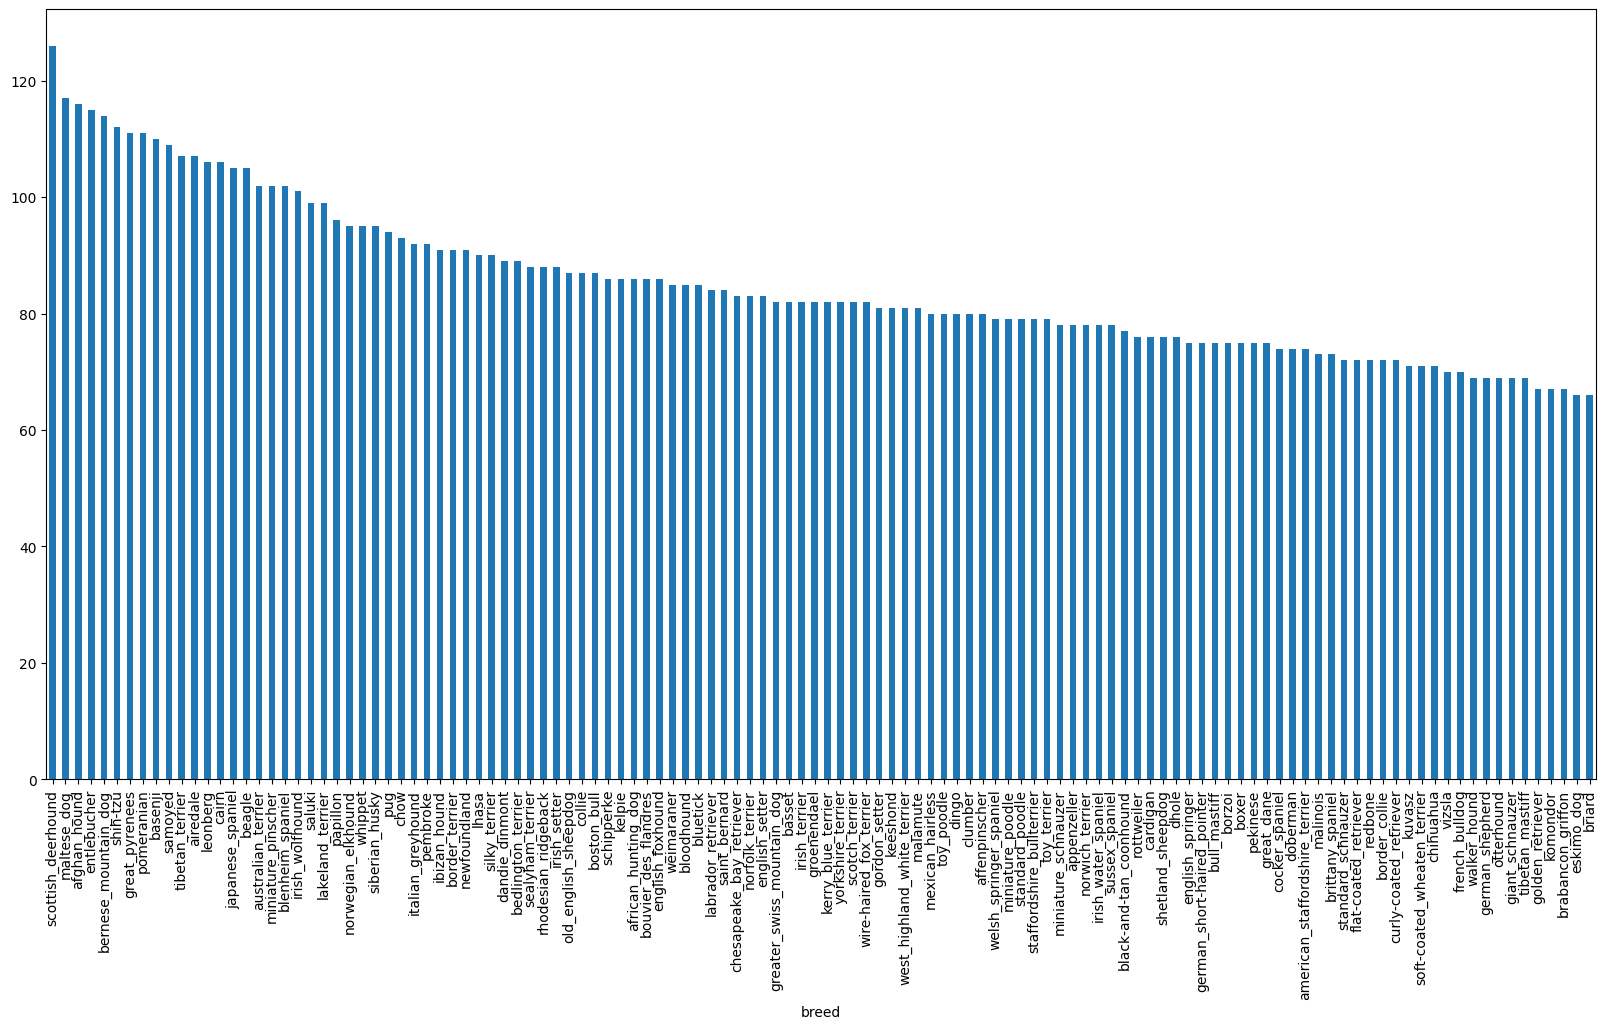

In [ ]:
## visualising the same
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10));

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

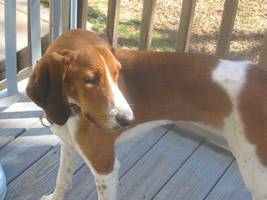

In [ ]:
from IPython.display import display, Image
Image("drive/My Drive/Dog Vision/train/289fe5f053910932c072c0296f5dc154.jpg")

In [ ]:
# Create pathnames from image ID's
filenames = ["drive/MyDrive/Dog Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10 filenames
filenames[:10]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
print(len(filenames))

10222


In [ ]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("drive/MyDrive/Dog Vision/train/")) == len(filenames):
  print("Filenames match actual amount of files!")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!


In [ ]:
print(len(os.listdir("drive/MyDrive/Dog Vision/train/")))

10222


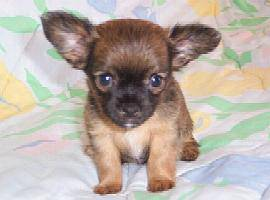

In [ ]:
# Check an image directly from a filepath
Image(filenames[9002])

In [ ]:
labels_csv["breed"][9002]

'brabancon_griffon'

Now we've got our image filepaths together, let's get the labels.

We'll take them from labels_csv and turn them into a NumPy array.

In [ ]:
import numpy as np
labels = labels_csv["breed"].to_numpy() # convert labels column to NumPy array
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [ ]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data directories.")

Number of labels matches number of filenames!


In [ ]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
#Turn one label into an array of booleans
print(labels[0])
labels[0] == unique_breeds # use COMPARISON operator to create boolean array

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn every label into a boolean array
boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
# Example: Turning a boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])[0][0]) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


Creating our own validation set
Since the dataset from Kaggle doesn't come with a validation set (a split of the data we can test our model on before making final predicitons on the test set), let's make one.

In [ ]:
# Setup X & y variables
X = filenames
y = boolean_labels

Let's start experimenting with 1000 and increase it as we need.

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}
NUM_IMAGES

1000

split our data into training and validation sets. We'll use and 80/20 split (80% training data, 20% validation data).

In [ ]:
# Import train_test_split from Scikit-Learn
from sklearn.model_selection import train_test_split

# Split them into training and validation using NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
# Check out the training data (image file paths and labels)
X_train[:5], y_train[:2]

(['drive/MyDrive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/Dog Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/Dog Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/Dog Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, 

Preprocessing images (turning images into Tensors)
Our labels are in numeric format but our images are still just file paths.

Since we're using TensorFlow, our data has to be in the form of Tensors.

To preprocess our images into Tensors we're going to write a function which does a few things:

- Take an image filepath as input
- Use TensorFlow to read the file and save it to a variable, `image`
- Turn our `image` (a jpg) into Tensors
- Normalize our `image` (convert color channel values from from 0-255 to 0-1).
- Resize the `image` to be a shape of (224, 224)
- Return the modified `image`

In [ ]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42]) # read in an image
image.shape

(257, 350, 3)

the shape of image is (257, 350, 3). This is height, width, colour channel value.

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  51],
        [ 97,  88,  47],
        [120, 111,  70]]], dtype=uint8)
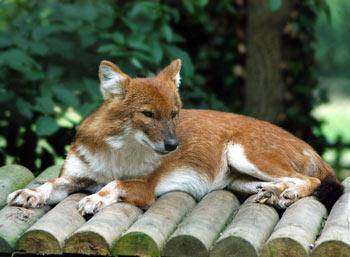

In [ ]:
image

In [ ]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [ ]:
# Define image size
IMG_SIZE = 224

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

Creating data batches

TensorFlow is very efficient when your data is in batches of (image, label) Tensors. So we'll build a function to do create those first. We'll take advantage of of process_image function at the same time.

In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [ ]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels

    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

Visualizing data batches

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

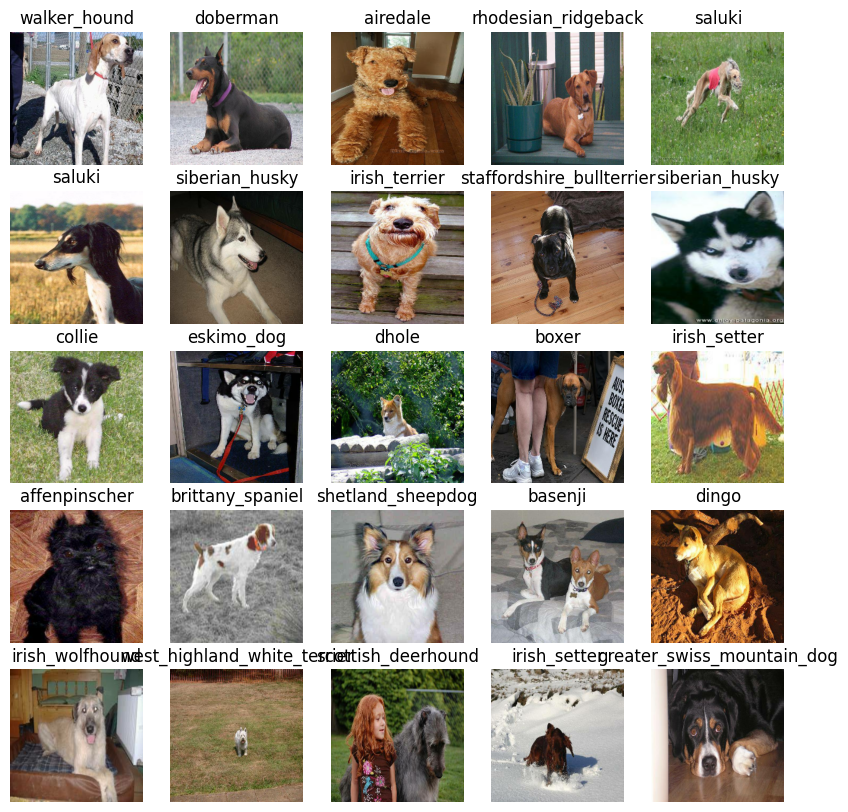

In [ ]:
# Visualize training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

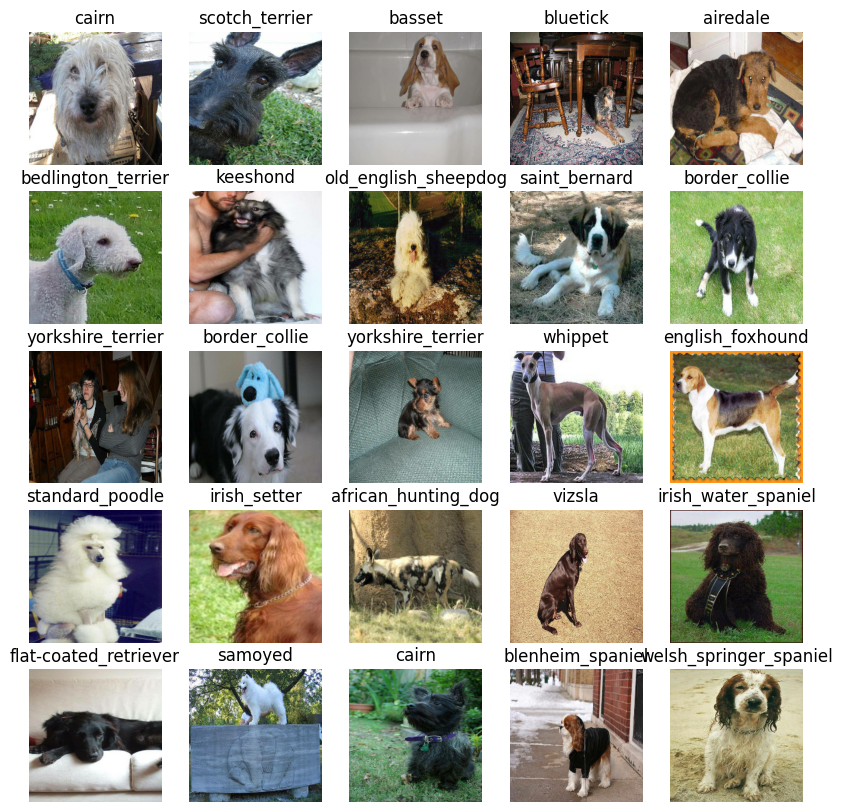

In [ ]:
# Visualize validation images from the validation data batch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

Creating and training a model

Before we build a model, there are a few things we need to define:

1. The input shape (our images shape, in the form of Tensors) to our model.
2. The output shape (image labels, in the form of Tensors) of our model.
3. The URL of the model we want to use from TensorFlow Hub

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

### Building a Model

We will be creating a function `create_model()` which :

1. Takes the input shape, output shape and the model we've chosen as parameters.
2. Defines the layers in a Keras model in sequential fashion (do this first, then this, then that).
3. Compiles the model (says it should be evaluated and improved).
4. Builds the model (tells the model the input shape it'll be getting).
5. Returns the model.

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
import tf_keras

# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print('Building model with:', MODEL_URL)

  # Setup the model layers
  model = tf_keras.Sequential([
      # Use the Hub layer and specify the input shape directly
      hub.KerasLayer(MODEL_URL, trainable=False, input_shape=input_shape[1:]),
      tf_keras.layers.Dense(units=OUTPUT_SHAPE, activation="softmax")
  ])

  # Compile the model
  model.compile(
      loss=tf_keras.losses.CategoricalCrossentropy(),
      optimizer=tf_keras.optimizers.Adam(),
      metrics=['accuracy']
  )

  # Do not explicitly build the model here, it will be built when training starts
  # model.build(input_shape)

  return model

model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


#Creating callbacks
We've got a model ready to go but before we train it we'll make some callbacks.

Callbacks are helper functions a model can use during training to do things such as save a models progress, check a models progress or stop training early if a model stops improving.

The two callbacks we're going to add are a TensorBoard callback and an Early Stopping callback.


Creating two callbacks:
1. For TensorBoard which helps track our models progress
2. For early stopping which prevents our model from training for too long.

#TensorBoard Callback

To set up a TensorBoard callback and view TensorBoard in a notebook, we need to do three things:

1. Load the TensorBoard notebook extension.
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's fit() function.
3. Visualize the our models training logs using the %tensorboard magic function (we'll do this later on).

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
# import datetime

# # Create a function to build a TensorBoard callback
# def create_tensorboard_callback():
#   # Create a log directory for storing TensorBoard logs
#   logdir = os.path.join("drive/MyDrive/Dog Vision/logs",
#                         # Make it so the logs get tracked whenever we run an experiment
#                         datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#   return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
# from tensorflow.keras.callbacks import TensorBoard

# # Create TensorBoard logs directory
# import datetime
# log_dir = "drive/MyDrive/Dog Vision/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# # Correct TensorBoard callback
# tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=1)


### Early Stopping Callback

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

In [ ]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements

#Training our Model on only 1000 Images


In [ ]:
# Check again if GPU is available (otherwise computing will take a looooonnnnggggg time)
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESS!!!!)


In [ ]:
# How many rounds should we get the model to look through the data?
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

NUM_EPOCHS defines how many passes of the data we'd like our model to do. A pass is equivalent to our model trying to find patterns in each dog image and see which patterns relate to each label.

###Boom! We've got a GPU running and NUM_EPOCHS setup. Let's create a simple function which trains a model. The function will:

1. Create a model using create_model().
2. Setup a TensorBoard callback using create_tensorboard_callback() (we do this here so it creates a log directory of the current date and time).
3. Call the fit() function on our model passing it the training data, validatation data, number of epochs to train for and the callbacks we'd like to use.
4. Return the fitted model.

In [ ]:
# # Build a function to train and return a trained model
# def train_model():
#   """
#   Trains a given model and returns the trained version.
#   """
#   # Create a model
#   model = create_model()

#   # Create new TensorBoard session everytime we train a model
#   tensorboard = create_tensorboard_callback()

#   # Fit the model to the data passing it the callbacks we created
#   model.fit(x=train_data,
#             epochs=NUM_EPOCHS,
#             validation_data=val_data,
#             validation_freq=1, # check validation metrics every epoch
#             callbacks=[tensorboard, early_stopping])

#   return model

In [ ]:
def train_model():
  # create a model
  model = create_model()

  # fit the model to the data passing the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[]) # Removing all callbacks

  # return the trained model
  return model

In [ ]:
# # Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 277s 11s/step - loss: 4.7001 - accuracy: 0.0887 - val_loss: 3.4607 - val_accuracy: 0.2350
Epoch 2/100
25/25 [==============================] - 4s 158ms/step - loss: 1.6927 - accuracy: 0.6513 - val_loss: 2.2063 - val_accuracy: 0.4800
Epoch 3/100
25/25 [==============================] - 4s 170ms/step - loss: 0.5800 - accuracy: 0.9300 - val_loss: 1.7022 - val_accuracy: 0.6000
Epoch 4/100
25/25 [==============================] - 4s 139ms/step - loss: 0.2604 - accuracy: 0.9825 - val_loss: 1.5154 - val_accuracy: 0.6150
Epoch 5/100
25/25 [==============================] - 3s 136ms/step - loss: 0.1543 - accuracy: 0.9950 - val_loss: 1.4320 - val_accuracy: 0.6750
Epoch 6/100
25/25 [==============================] - 5s 211ms/step - loss: 0.1048 - accuracy: 0.9975 - val_loss: 1.3784 - val_accuracy: 0.6650
Epoch 7/100
25/25 [==============================

In [ ]:
predictions = model.predict(val_data, verbose = 1)
predictions

7/7 [==============================] - 2s 158ms/step


array([[4.7867553e-04, 1.5684182e-05, 9.5683261e-04, ..., 9.0379152e-05,
        7.2019031e-07, 3.7373886e-03],
       [4.0023265e-04, 4.1910571e-05, 1.1185403e-03, ..., 9.7253294e-05,
        1.1899994e-04, 3.2483679e-06],
       [2.7034362e-06, 3.6931019e-06, 2.9523210e-06, ..., 3.9910101e-06,
        6.7814753e-06, 2.3089462e-05],
       ...,
       [1.3521509e-07, 6.3475863e-07, 3.4707532e-06, ..., 6.1843366e-08,
        6.9198431e-06, 6.9182333e-06],
       [3.6246615e-04, 1.1211364e-05, 1.6250950e-05, ..., 1.1212262e-05,
        2.6489558e-06, 5.1264716e-03],
       [6.5559725e-05, 7.8349449e-06, 1.5743919e-04, ..., 1.1150225e-03,
        9.9623365e-05, 1.0713401e-05]], dtype=float32)

In [ ]:
index = 67
print("Prediction Info : ")
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

Prediction Info : 
Max value (probability of prediction): 0.9347209334373474
Sum: 0.9999998807907104
Max index: 0
Predicted label: affenpinscher


In [ ]:
unique_breeds[0]

'affenpinscher'

In [ ]:
# Making Prediction Probabilities into their Respective Labels
def get_pred_labels(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]

In [ ]:
get_pred_labels(predictions[69])

'toy_poodle'

In [ ]:
# Create a function to unbatch a batch dataset (Takes a batched dataset of (image, label) Tensors and returns separate arrays of images and labels.)
def unbatchify(data):
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

In [ ]:
# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

Visualizing our Model's Predictions

In [ ]:
# Function to View the prediction, ground truth and image for sample n
def plot_pred(prediction_probabilities, labels, images, n=1):
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_labels(pred_prob)

  # Plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Title
  plt.title("Predicted Breed : {} ||| Probability : {:2.0f}% ||| Actual Breed : {}".format(pred_label, np.max(pred_prob)*100,true_label),color=color)

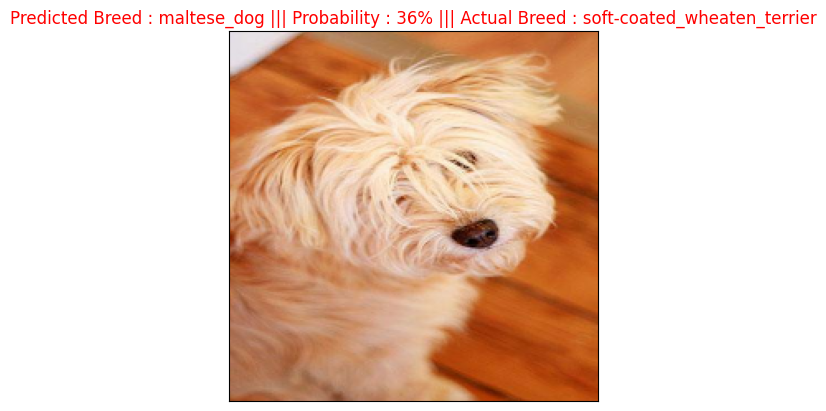

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=177)

Checking out the top predictions made for an Image by our Model

i.e, We are going to check, Suppose given an Image of a Dog of Breed A, which are the breeds our model will predict that it might be.

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  pred_prob = prediction_probabilities[n]
  true_label = labels[n]

  # Get the predicted Label
  pred_label = get_pred_labels(pred_prob)

  # Find the top 10 predictions made
  top10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  # find the top 10 prediction confidence values
  top10_pred_probs = pred_prob[top10_pred_indexes]

  # find top 10 pred labels
  top10_pred_labels = unique_breeds[top10_pred_indexes]

  # PLOT IT
  bars = plt.bar(np.arange(len(top10_pred_labels)), top10_pred_probs, color="grey")
  plt.xticks(np.arange(len(top10_pred_labels)), top10_pred_labels, rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top10_pred_labels):
      true_label_index = np.where(top10_pred_labels == true_label)[0][0]
      bars[true_label_index].set_color("green")
  else:
      pass

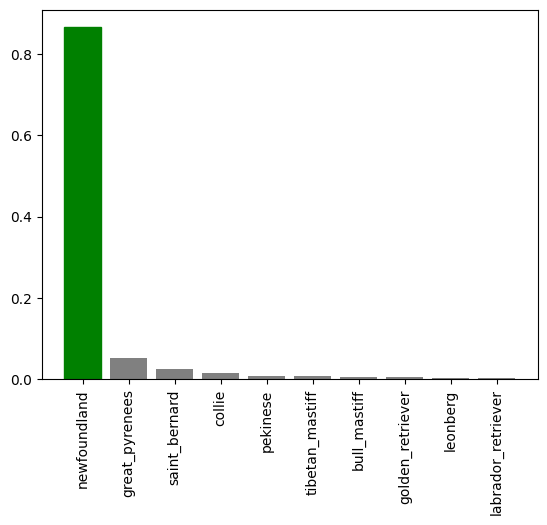

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=71)

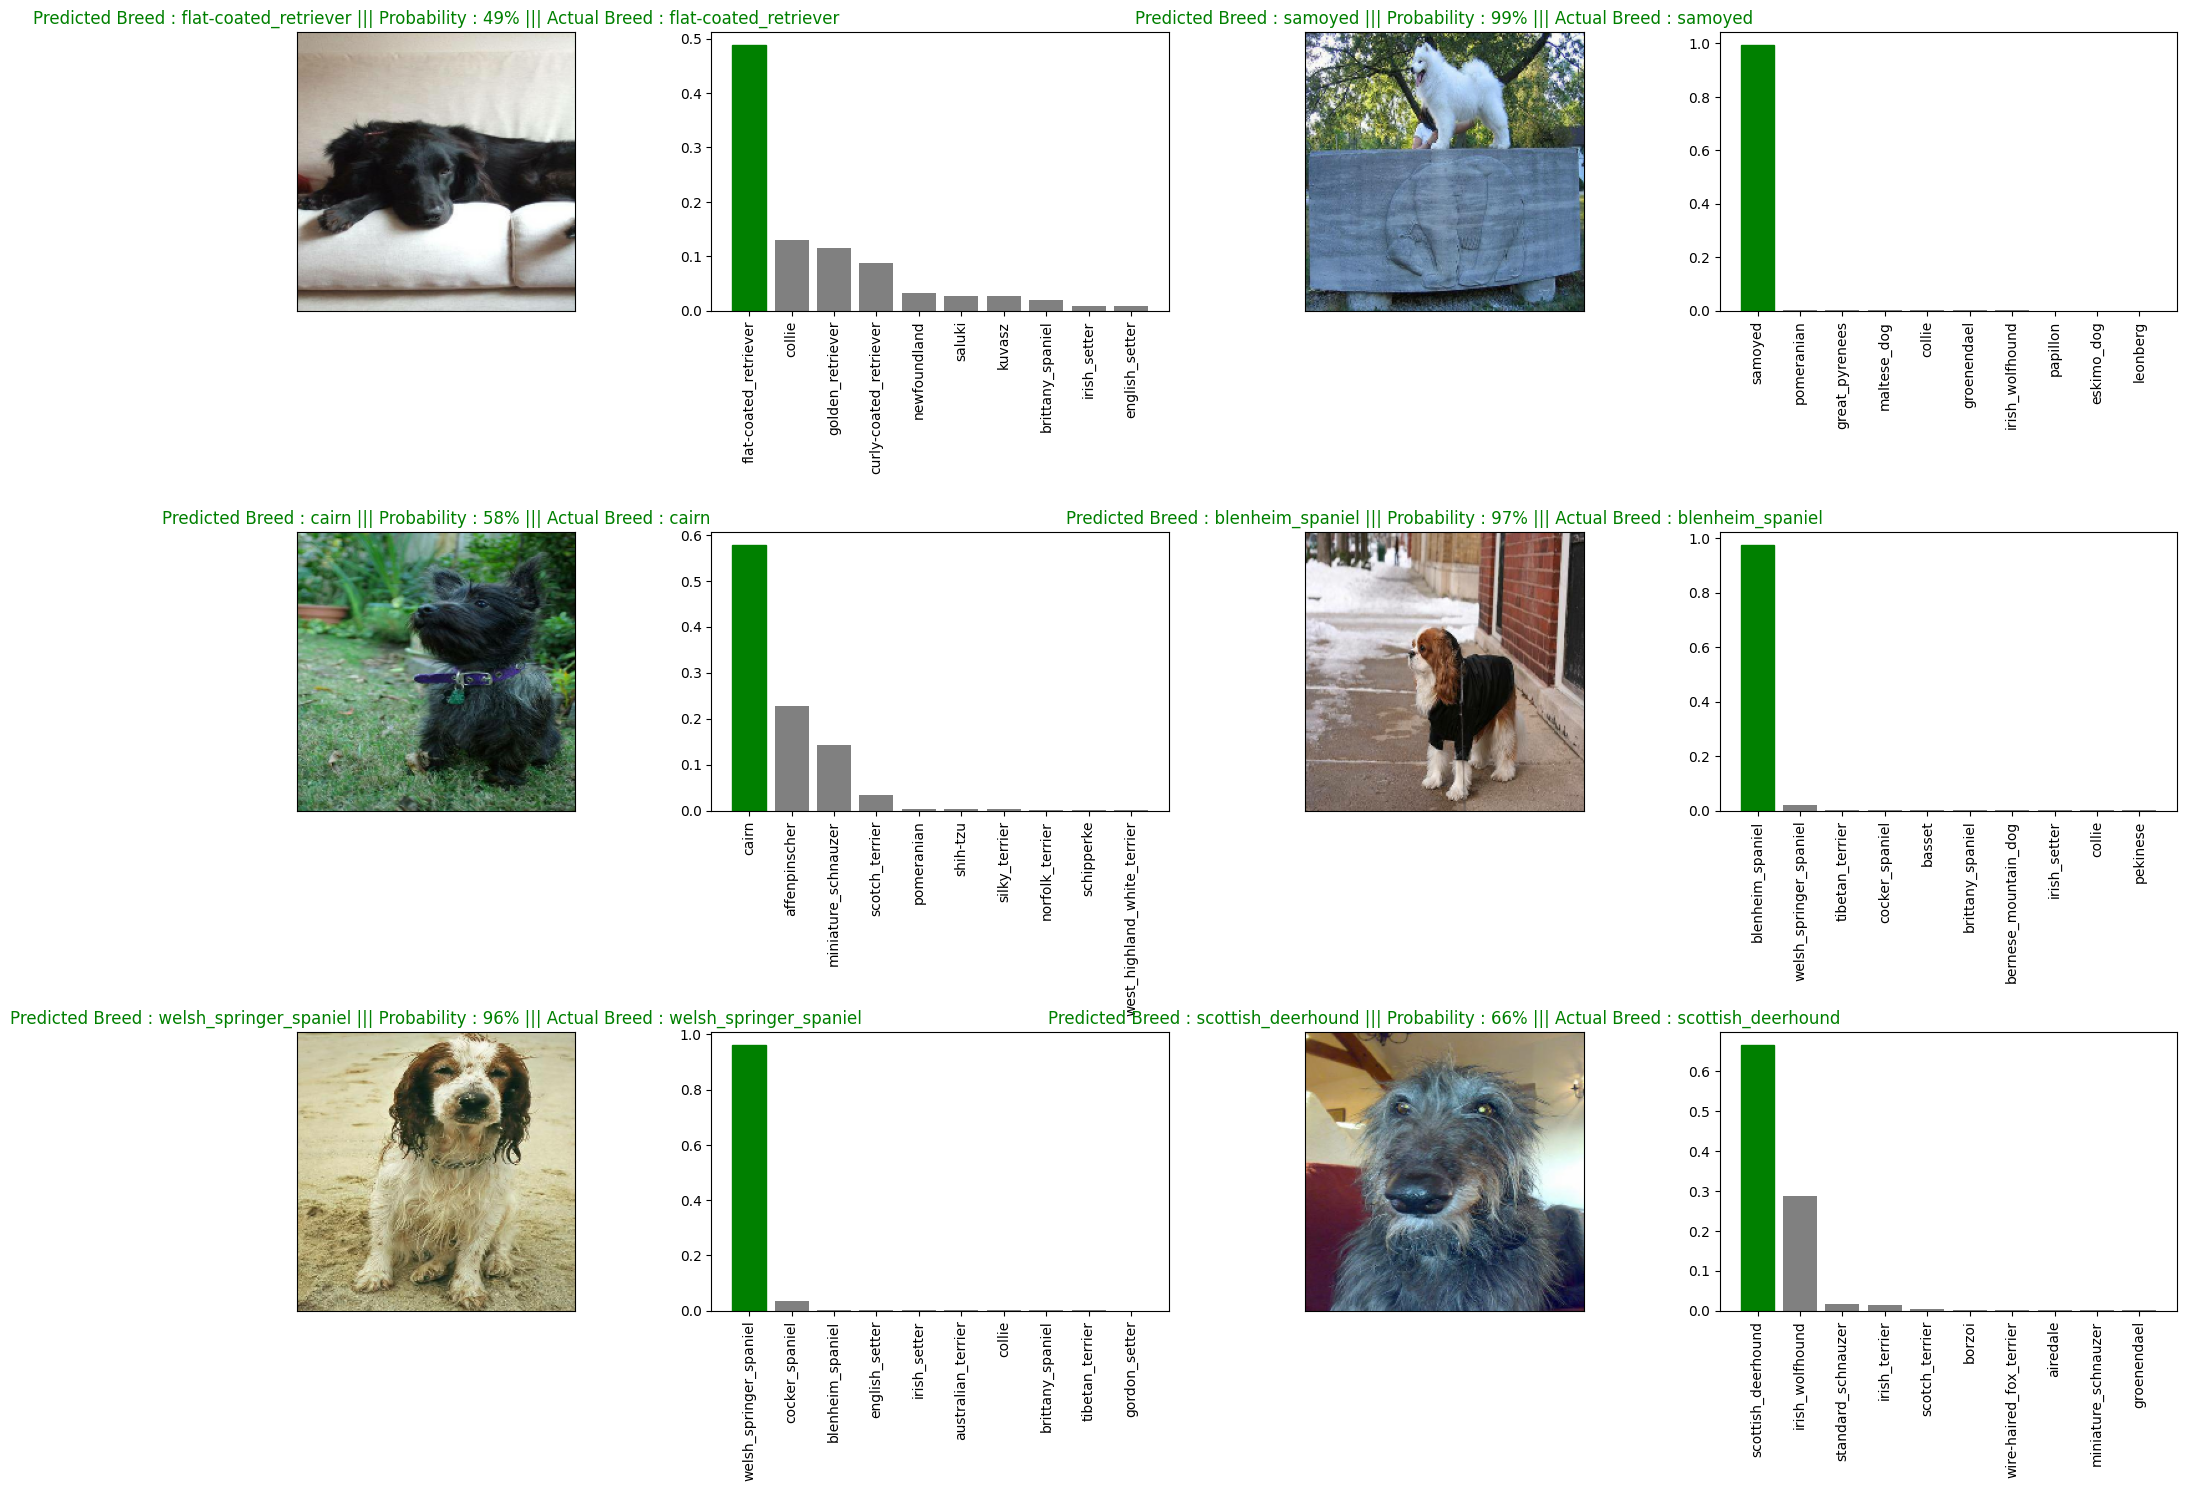

In [ ]:
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

# Saving and Reloading our Model

In [ ]:
import os
import datetime
import tensorflow as tf
import tensorflow_hub as hub

def save_model(model, suffix=None):
    modeldir = os.path.join(
        "drive/MyDrive/Dog Vision/models",
        datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    )
    os.makedirs(modeldir, exist_ok=True)
    model_path = os.path.join(modeldir, f"model_{suffix}.h5")
    print(f"Saving model to: {model_path}...")
    model.save(model_path, save_format='h5')
    return model_path

def load_model(model_path):
    print(f"Loading saved model from: {model_path}")
    return tf.keras.models.load_model(
        model_path, custom_objects={'KerasLayer': hub.KerasLayer}
    )


In [ ]:
# Save
model.save("drive/MyDrive/Dog Vision/model_1000-images-mobilenetv2-Adam.h5", save_format="h5")

/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow_hub as hub
import tf_keras

loaded_model_1000IMG = tf_keras.models.load_model(
    "drive/MyDrive/Dog Vision/model_1000-images-mobilenetv2-Adam.h5",
    custom_objects={"KerasLayer": hub.KerasLayer}
)

In [ ]:
# verifying our loaded model
loaded_model_1000IMG.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_1 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


In [ ]:
# Evaluate the Loaded Model
loaded_model_1000IMG.evaluate(val_data)

7/7 [==============================] - 2s 141ms/step - loss: 1.2069 - accuracy: 0.6900


[1.2068743705749512, 0.6899999976158142]

# Training a big dog model 🐶 (on the full data (10.2 k Images))

In [ ]:
len(X), len(y)

(10222, 10222)

In [ ]:
# Create a databatch with full data
full_data = create_data_batches(X,y)

Creating training data batches...


In [ ]:
# create a model for full data
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
# # create call backs for full model
# full_model_tensorboard = create_tensorboard_callback()

In [ ]:
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3)

### Fitting the Model to the Whole Data (This might take around 30 minutes)

In [ ]:
full_model.fit(x=full_data, epochs=20)

Epoch 1/20
320/320 [==============================] - 44s 123ms/step - loss: 1.3503 - accuracy: 0.6671
Epoch 2/20
320/320 [==============================] - 40s 124ms/step - loss: 0.4044 - accuracy: 0.8785
Epoch 3/20
320/320 [==============================] - 40s 125ms/step - loss: 0.2378 - accuracy: 0.9348
Epoch 4/20
320/320 [==============================] - 65s 205ms/step - loss: 0.1541 - accuracy: 0.9614
Epoch 5/20
320/320 [==============================] - 40s 124ms/step - loss: 0.1058 - accuracy: 0.9794
Epoch 6/20
320/320 [==============================] - 40s 123ms/step - loss: 0.0777 - accuracy: 0.9875
Epoch 7/20
320/320 [==============================] - 40s 125ms/step - loss: 0.0583 - accuracy: 0.9912
Epoch 8/20
320/320 [==============================] - 39s 122ms/step - loss: 0.0461 - accuracy: 0.9933
Epoch 9/20
320/320 [==============================] - 41s 127ms/step - loss: 0.0385 - accuracy: 0.9952
Epoch 10/20
320/320 [==============================] - 40s 124ms/step - l

In [ ]:
#save the model
model.save("drive/MyDrive/Dog Vision/models/full_model_10k-images-mobilenetv2-Adam.h5", save_format="h5")

In [ ]:
# Load the model
import tensorflow_hub as hub
import tf_keras

loaded_full_model  = tf_keras.models.load_model(
    "drive/MyDrive/Dog Vision/models/full_model_10k-images-mobilenetv2-Adam.h5",
    custom_objects={"KerasLayer": hub.KerasLayer}
)

### Making predictions on custom images

In [ ]:
# Get custom image filepaths : /content/drive/MyDrive/dog-test-images/
import os

custom_path = "drive/MyDrive/dog-test-images/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
custom_image_paths

['drive/MyDrive/dog-test-images/images (1).jpeg',
 'drive/MyDrive/dog-test-images/images (2).jpeg',
 'drive/MyDrive/dog-test-images/Golden+Retrievers+dans+pet+care.jpeg',
 'drive/MyDrive/dog-test-images/images (3).jpeg']

In [ ]:
# Turn custom images into batch datasets
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches...


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

1/1 [==============================] - 0s 448ms/step


In [ ]:
custom_preds.shape

(4, 120)

In [ ]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_labels(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['newfoundland', 'samoyed', 'irish_setter', 'maltese_dog']

In [ ]:
# Get custom images (our unbatchify() function won't work since there aren't labels... maybe we could fix this later)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

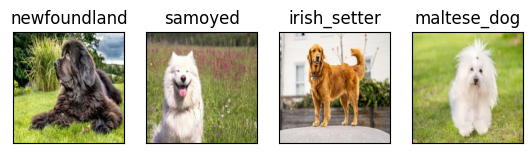

In [ ]:
# Custom Image Predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(2, 6, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)